## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [1]:
from src.attractor_id.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot, make_polytope_plot

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'straight_separatrix'
- 'radial_2labels'
- 'radial_3labels'
- 'curved_separatrix'
- 'EMT'
- 'periodic'
- 'ellipsoidal_kd' for k = 2, 3, 4, 5, 6
- 'DSGRN_2d_network'
- 'iris'
- 'leslie'
- 'periodic_3labels'

In [2]:
system = 'periodic_3labels'

N = 10 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # threshold in (0, 1/2) used to label cubes

epochs = 20 # number of times that the data is cycled through during neural network training

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [3]:
model_filename = 'model'
model = train_classifier(system, N, epochs, model_filename)

Epoch 1/20
Test loss: 0.148722
Train loss: 0.157158
Epoch 2/20
Test loss: 0.090263
Train loss: 0.084883
Epoch 3/20
Test loss: 0.043593
Train loss: 0.040441
Epoch 4/20
Test loss: 0.013556
Train loss: 0.016977
Epoch 5/20
Test loss: 0.007183
Train loss: 0.009007
Epoch 6/20
Test loss: 0.006991
Train loss: 0.003782
Epoch 7/20
Test loss: 0.006874
Train loss: 0.005128
Epoch 8/20
Test loss: 0.006862
Train loss: 0.002861
Epoch 9/20
Test loss: 0.006682
Train loss: 0.005279
Epoch 10/20
Test loss: 0.007151
Train loss: 0.004252
Epoch 11/20
Test loss: 0.006516
Train loss: 0.003174
Epoch 12/20
Test loss: 0.006153
Train loss: 0.002128
Epoch 13/20
Test loss: 0.006181
Train loss: 0.005721
Epoch 14/20
Test loss: 0.005829
Train loss: 0.005272
Epoch 15/20
Test loss: 0.006017
Train loss: 0.004664
Epoch 16/20
Test loss: 0.005814
Train loss: 0.010844
Epoch 17/20
Test loss: 0.005442
Train loss: 0.005023
Epoch 18/20
Test loss: 0.005732
Train loss: 0.007086
Epoch 19/20
Test loss: 0.005747
Train loss: 0.005738
Ep

### Compute homology of labeled regions of the phase space decomposition obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

In [4]:
labeling_threshold = 0.1
hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model)

Betti numbers of label 0 region: [1, 0, 0]
Betti numbers of label 1 region: [2, 0, 0]
Betti numbers of uncertain region: [1, 0, 0]
Number of cubes labeled:  107


### Produce figure of phase space decomposition

The decomposition overlays points of phase space colored according to the value of the network.

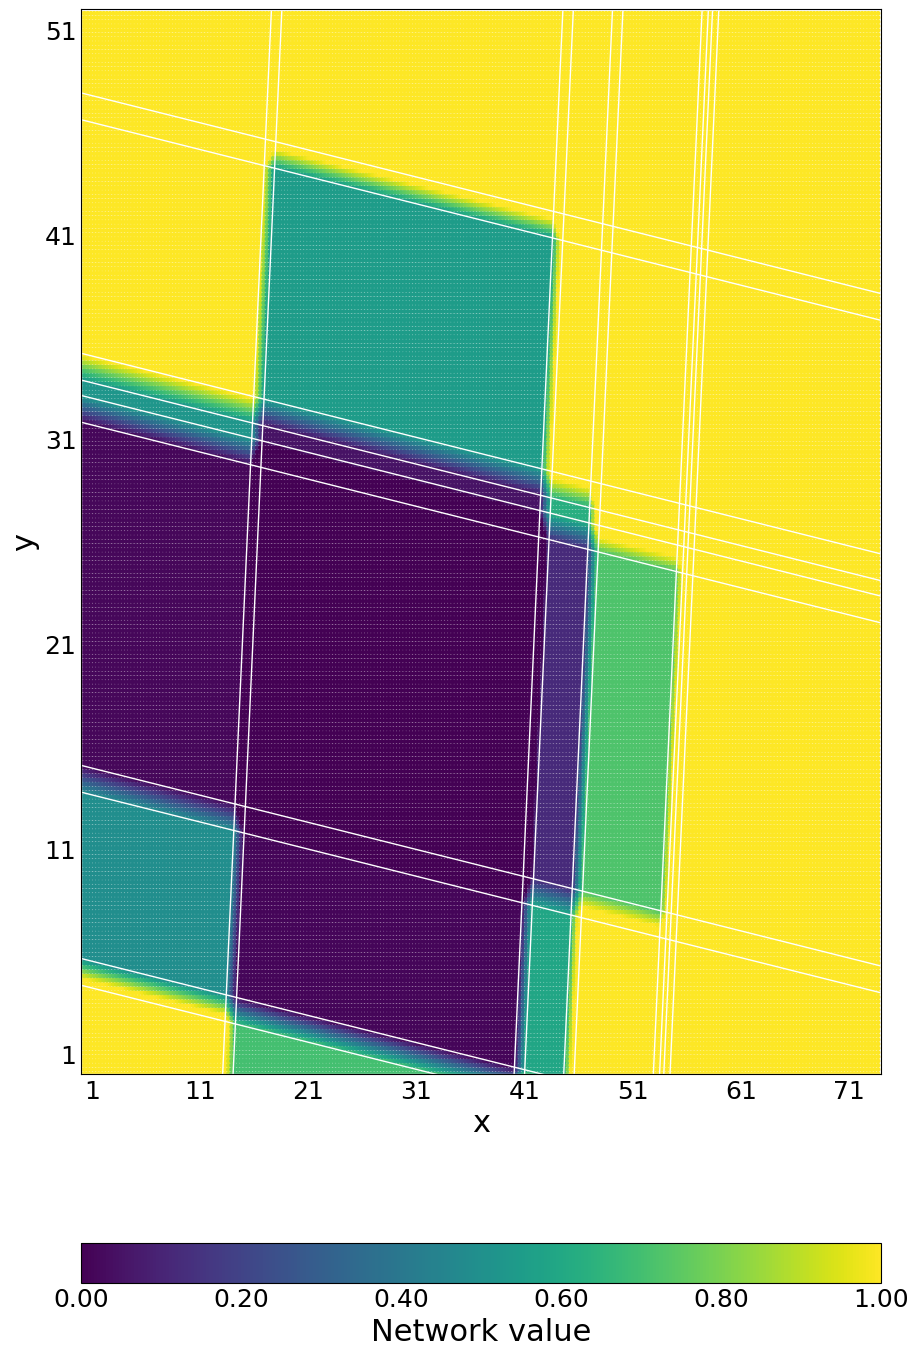

In [5]:
file_name = 'decomposition_plot'
make_decomposition_plot(system, hyperplane_list, model, file_name)

### Produce figure of labeled cubes

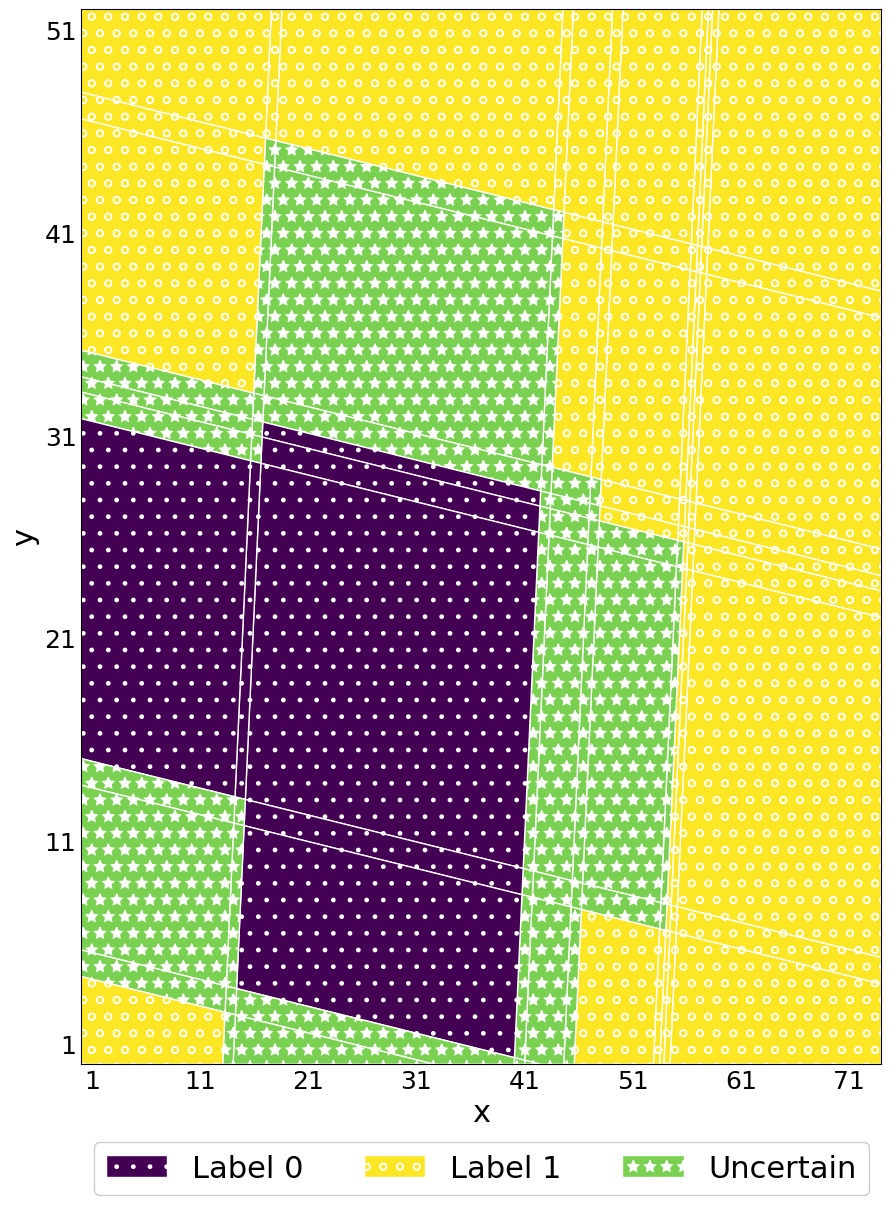

In [6]:
file_name = 'polytope_plot'
make_polytope_plot(system, cube_list, file_name)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files in the folder ```config```. 

The following sentence if false at the moment. This computation used the data available at https://github.com/begelb/attractor-id-data. To use a local copy of data, change the parameter ```using_local_data``` to ```True``` and change the paths following ```train_data_file``` and ```test_data_file``` in the configuration file to the appropriate paths.